In [25]:
import numpy as np
import pandas as pd
from pathlib import Path
import pathlib
import cv2
from sklearn.model_selection import train_test_split

In [4]:
def applyGaussianBlur(input_video, output_video, kernel_size=(30,30)):
    cap = cv2.VideoCapture(input_video)
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        blurred_frame = cv2.GaussianBlur(frame, kernel_size, 0)
        
        out.write(blurred_frame)
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

dataDir = pathlib.Path('UCF-101-Blurred')
dataDir.mkdir(exist_ok=True)

for dir in sorted(pathlib.Path('UCF-101/').glob('*')):
    dirName = dir.name + '-Blurred'
    newDirPath = dataDir / dirName
    newDirPath.mkdir(parents=True, exist_ok=True)
    i = 1

    for vid in dir.iterdir():
        if vid.is_file() and vid.suffix == '.avi':
            vidFile = f'{dir.name.lower()}-vid{i}.mp4'
            vidPath = newDirPath / vidFile

            applyGaussianBlur(str(vid), str(vidPath), kernel_size=(15,15))
            
            i += 1
            print(f"Applied Gaussian blur to {vid} and saved as {vidPath}")

Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g15_c01.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid1.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c05.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid2.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g20_c03.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid3.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g24_c03.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid4.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g25_c07.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid5.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01.avi and saved as UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid6.mp4
Applied Gaussian blur to UCF-101/ApplyEyeMakeup/v_ApplyEyeMakeup_g08_c04.avi and s

In [5]:
import os
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

def get_video_duration(file_path):
    clip = VideoFileClip(file_path)
    duration = clip.duration
    clip.close()
    return duration

def create_histogram(durations, folder_name, output_dir):
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=20, edgecolor='black')
    plt.title(f'Video Duration Histogram for {folder_name}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(output_dir, f'{folder_name}_histogram.png'))
    plt.close()

def process_folders(root_folder, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):
            durations = []
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.avi'):
                    file_path = os.path.join(folder_path, file_name)
                    duration = get_video_duration(file_path)
                    durations.append(duration)
            
            if durations:
                create_histogram(durations, folder_name, output_dir)
                print(f"Histogram created for {folder_name}")
            else:
                print(f"No AVI files found in {folder_name}")

In [6]:
process_folders("UCF-101", "histFolder")

Histogram created for BoxingSpeedBag
Histogram created for BenchPress
Histogram created for Archery
Histogram created for BlowingCandles
Histogram created for BodyWeightSquats
Histogram created for BabyCrawling
Histogram created for Biking
Histogram created for BaseballPitch
Histogram created for BandMarching
Histogram created for Basketball
Histogram created for ApplyEyeMakeup
Histogram created for Billiards
Histogram created for BlowDryHair
Histogram created for ApplyLipstick
Histogram created for Bowling
Histogram created for BoxingPunchingBag
Histogram created for BasketballDunk
Histogram created for BalanceBeam


In [3]:
def getVidRes(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

getVidRes("UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyeyemakeup-vid1.mp4")

(320, 240)

In [26]:
#Creating a DataFrame of video paths and labels
dataDirPath = pathlib.Path('UCF-101-Blurred')
videoPaths = []
videoLabels = []
videoRes = []
for dir in sorted(dataDirPath.rglob('*')):
    for file in sorted(dir.rglob('*')):
        videoLabels.append(str(dir).split('-')[2].split('/')[1])
        videoPaths.append(file)
        vidW, vidH = getVidRes(file)
        videoRes.append((vidW, vidH))

data = pd.DataFrame(columns=["Path", "Labels", "Resolutions"])
data['Path'] = videoPaths
data['Labels'] = videoLabels
data['Resolutions'] = videoRes

#data = data.sample(frac=1).reset_index(drop=True)
data

,Path,Labels,Resolutions
0,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,ApplyEyeMakeup,"(320, 240)"
1,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,ApplyEyeMakeup,"(320, 240)"
2,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,ApplyEyeMakeup,"(320, 240)"
3,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,ApplyEyeMakeup,"(320, 240)"
4,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,ApplyEyeMakeup,"(320, 240)"
...,...,...,...
2354,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,BoxingSpeedBag,"(320, 240)"
2355,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,BoxingSpeedBag,"(320, 240)"
2356,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,BoxingSpeedBag,"(320, 240)"
2357,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,BoxingSpeedBag,"(320, 240)"


In [27]:
list(data['Labels'].unique())

['ApplyEyeMakeup',
 'ApplyLipstick',
 'Archery',
 'BabyCrawling',
 'BalanceBeam',
 'BandMarching',
 'BaseballPitch',
 'Basketball',
 'BasketballDunk',
 'BenchPress',
 'Biking',
 'Billiards',
 'BlowDryHair',
 'BlowingCandles',
 'BodyWeightSquats',
 'Bowling',
 'BoxingPunchingBag',
 'BoxingSpeedBag']

In [28]:
oheMat = np.eye(18, 18)
labelMap = {label: list(oheMat[i]) for i, label in enumerate(list(data['Labels'].unique()))}
data['Labels'] = data["Labels"].map(labelMap)
data

,Path,Labels,Resolutions
0,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
1,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
2,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
3,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
4,UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
...,...,...,...
2354,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
2355,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
2356,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"
2357,UCF-101-Blurred/BoxingSpeedBag-Blurred/boxings...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(320, 240)"


In [29]:
data = data.sample(frac=1).reset_index(drop=True)
data
x = data['Path']
y = data['Labels']

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
xTrain

1064    UCF-101-Blurred/BandMarching-Blurred/bandmarch...
1377    UCF-101-Blurred/BabyCrawling-Blurred/babycrawl...
478     UCF-101-Blurred/BenchPress-Blurred/benchpress-...
1911    UCF-101-Blurred/ApplyEyeMakeup-Blurred/applyey...
744     UCF-101-Blurred/ApplyLipstick-Blurred/applylip...
                              ...                        
1638    UCF-101-Blurred/BasketballDunk-Blurred/basketb...
1095      UCF-101-Blurred/Biking-Blurred/biking-vid17.mp4
1130    UCF-101-Blurred/BoxingPunchingBag-Blurred/boxi...
1294    UCF-101-Blurred/BabyCrawling-Blurred/babycrawl...
860      UCF-101-Blurred/Biking-Blurred/biking-vid116.mp4
Name: Path, Length: 1887, dtype: object

In [32]:
# Model using PyTorch 
# Model is LSTM + CNN where the CNN is a ResNet50 base model which is not pretrained.
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.transforms import Compose, Resize, ToTensor, GaussianBlur

class VideoActionRecognitionModel(nn.Module):
    def __init__(self, num_classes=18):
        super(VideoActionRecognitionModel, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        # Remove the last fully connected layer
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-1])
        self.lstm = nn.LSTM(input_size=2048, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, num_classes)

    def forward(self, x):
        # x shape: (batch_size, num_frames, 3, height, width)
        batch_size, num_frames, _, height, width = x.size()
        # Reshape x to (batch_size * num_frames, 3, height, width)
        x = x.view(batch_size * num_frames, 3, height, width)
        x = self.resnet(x)
        x = x.view(batch_size, num_frames, -1)  # Shape: (batch_size, num_frames, 2048)
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])  # Use the last time step output
        return out

In [14]:
import torch

def get_model_summary(model, input_size):
    dummy_input = torch.zeros(*input_size)

    def hook(module, input, output):
        if isinstance(output, tuple):
            output = output[0]
        print(f"{module.__class__.__name__.ljust(20)} | {str(input[0].shape).ljust(30)} | {str(output.shape).ljust(30)}")

    hooks = []
    for layer in model.children():
        hooks.append(layer.register_forward_hook(hook))

    with torch.no_grad():
        model(dummy_input)

    for hook in hooks:
        hook.remove()

vidRec = VideoActionRecognitionModel()

get_model_summary(vidRec, (8, 30, 3, 240, 320))  # Batch size of 1, 30 frames


Sequential           | torch.Size([240, 3, 240, 320]) | torch.Size([240, 2048, 1, 1]) 
LSTM                 | torch.Size([8, 30, 2048])      | torch.Size([8, 30, 50])       
Linear               | torch.Size([8, 50])            | torch.Size([8, 18])           


In [33]:
# Getting number of frames for every video to check whether they are same or not
import cv2
import numpy as np

def getTotalFrames(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return total_frames

videos = list(data['Path'])

frameList = [getTotalFrames(video_path=video) for video in videos]

In [34]:
max(frameList)

631

In [77]:
import cv2
import torch
import numpy as np
import os

class dat(torch.utils.data.Dataset):
    def __init__(self, paths, labels, transform=None):
        self.paths = paths
        self.targs = labels
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        video_path = self.paths[idx]
        cap = cv2.VideoCapture(video_path)
        frames = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            if self.transform:
                frame = self.transform(frame)

            frame_tensor = torch.from_numpy(frame).permute(2, 0, 1).float()  # Shape: C x H x W
            frames.append(frame_tensor)

        cap.release()

        video_tensor = torch.stack(frames)

        return video_tensor, self.targs[idx]


In [78]:
xTrain[0]

PosixPath('UCF-101-Blurred/BandMarching-Blurred/bandmarching-vid15.mp4')

In [79]:
dat(xTrain, yTrain).__getitem__(1)

(tensor([[[[  3.,   3.,   3.,  ...,  47.,  47.,  47.],
           [  4.,   4.,   4.,  ...,  47.,  47.,  47.],
           [  4.,   4.,   4.,  ...,  49.,  49.,  49.],
           ...,
           [104., 103., 102.,  ..., 105., 107., 106.],
           [106., 105., 104.,  ..., 104., 106., 105.],
           [106., 105., 104.,  ..., 104., 105., 105.]],
 
          [[  3.,   3.,   3.,  ...,  38.,  38.,  38.],
           [  4.,   4.,   4.,  ...,  38.,  38.,  38.],
           [  4.,   4.,   4.,  ...,  37.,  37.,  37.],
           ...,
           [ 76.,  75.,  74.,  ...,  62.,  61.,  60.],
           [ 75.,  74.,  73.,  ...,  61.,  60.,  59.],
           [ 75.,  74.,  73.,  ...,  61.,  59.,  59.]],
 
          [[  0.,   0.,   0.,  ...,   7.,   7.,   7.],
           [  0.,   0.,   0.,  ...,   7.,   7.,   7.],
           [  0.,   0.,   0.,  ...,   7.,   7.,   7.],
           ...,
           [ 38.,  37.,  36.,  ...,   4.,   4.,   3.],
           [ 38.,  37.,  36.,  ...,   5.,   5.,   4.],
           

In [94]:
# Custom Collate Function to provide padding to the videos in the batch with respect to the formula:
# No. of frames to be padded = Maximum frame length of any video in the batch - current video frame length
def collate_fn(batch):
    max_frame_count = max(video[0].shape[0] for video in batch)

    padded_videos = []
    targets = []

    for video, target in batch:
        num_frames = video.shape[0]
        pad_frames = max_frame_count - num_frames

        padded_video = torch.nn.functional.pad(
            video,
            (0, 0, 0, 0, 0, 0, 0, pad_frames),
            mode='constant',
            value=0  # Zero padding
        )

        padded_video = padded_video.float() / 255.0  # Normalize to [0, 1]

        padded_videos.append(padded_video)
        targets.append(target)

    # Stack the padded videos and targets to form a batch
    padded_videos = torch.stack(padded_videos)
    targets = torch.tensor(targets)

    return padded_videos, targets


Batch 1:
Videos shape: torch.Size([4, 257, 3, 240, 320])
Targets shape: torch.Size([4, 18])
First video max value: 1.0, min value: 0.0
Batch 2:
Videos shape: torch.Size([4, 482, 3, 240, 320])
Targets shape: torch.Size([4, 18])
First video max value: 0.9921568632125854, min value: 0.0


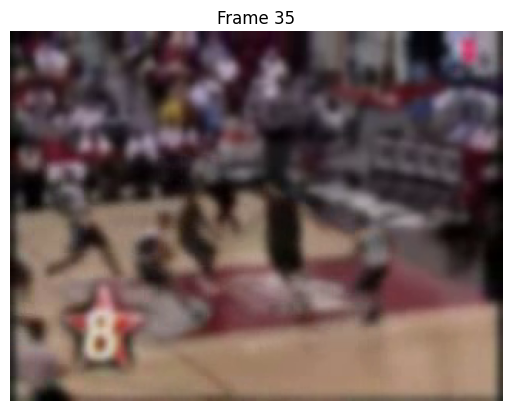

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=torch.float64)


In [95]:
dataset = dat(xTrain, yTrain)

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn
)

# Iterate through the DataLoader and print some details about the batches
for i, (videos, targets) in enumerate(dataloader):
    print(f"Batch {i + 1}:")
    print(f"Videos shape: {videos.shape}")
    print(f"Targets shape: {targets.shape}")
    print(f"First video max value: {videos[0].max()}, min value: {videos[0].min()}")
    
    if i == 1:
        break




import matplotlib.pyplot as plt

# Get a batch of videos and targets
for videos, targets in dataloader:
    video_to_visualize = videos[3]
    break

# Select a specific frame to visualize (e.g., the 10th frame, index 9)
frame_index = 34

frame = video_to_visualize[frame_index].permute(1, 2, 0).numpy()  # (C, H, W) -> (H, W, C)

# Display the frame
plt.imshow(frame)
plt.axis('off')
plt.title(f'Frame {frame_index + 1}')
plt.show()
print(targets)
